In [3]:
#0817회의 후 역할분담
#cj물류데이터 EDA 정아

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

In [4]:
#제공데이터 불러오기

cjdt = pd.read_excel \
('../../data/bigcontest/05_물류데이터(CJ올리브네트웍스)/2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx')

In [5]:
cjdt['DL_YMD'] = pd.to_datetime(cjdt['DL_YMD'], format='%y%m%d')
cjdt.info()
cjdt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DL_YMD         156571 non-null  datetime64[ns]
 1   DL_GD_LCLS_NM  156571 non-null  object        
 2   DL_GD_LCLS_CD  156571 non-null  int64         
 3   CTPV_NM        156571 non-null  object        
 4   CTPV_CD        156571 non-null  int64         
 5   CTGG_NM        156571 non-null  object        
 6   CTGG_CD        156571 non-null  int64         
 7   HDNG_NM        156571 non-null  object        
 8   HDNG_CD        156571 non-null  int64         
 9   INVC_CONT      156571 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 11.9+ MB


,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT
0,2019-02-01,도서/음반,12,서울특별시,11,중구,14,동화동,665,16
1,2019-02-01,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4
2,2019-02-01,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1
3,2019-02-01,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6
4,2019-02-01,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21


In [6]:
cjdt['DL_YM'] = cjdt.DL_YMD.apply(lambda X: X.strftime('%y%m'))

In [7]:
cjdt['DL_Y'] = cjdt.DL_YMD.apply(lambda X: X.strftime('%Y'))

In [8]:
#단일변수
#시기별 물류량 비교

In [9]:
#월별
cjdt.groupby('DL_YM')[['INVC_CONT']].sum()

,INVC_CONT
DL_YM,
1902,1627147
1903,1977310
1904,2010280
1905,2048914
2002,2348916
2003,2764249
2004,2438587
2005,2610071


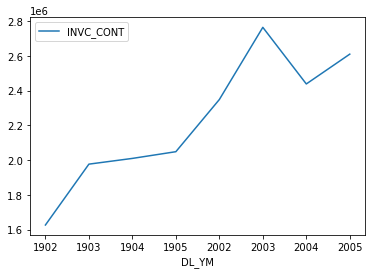

In [10]:
cjdt.groupby('DL_YM')[['INVC_CONT']].sum().plot()

In [11]:
#일별
cjdt.groupby('DL_YMD')[['INVC_CONT']].sum()

,INVC_CONT
DL_YMD,
2019-02-01,11575
2019-02-02,1646
2019-02-03,369
2019-02-04,123
2019-02-05,69
...,...
2020-05-27,106021
2020-05-28,100891
2020-05-29,91972


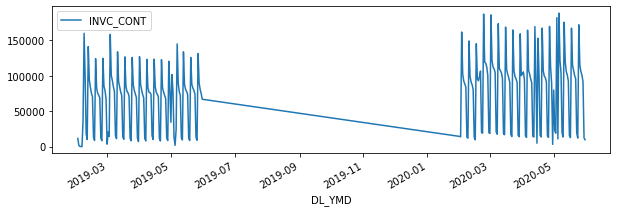

In [12]:
cjdt.groupby('DL_YMD')[['INVC_CONT']].sum().plot(figsize=(10,3))

In [13]:
#요일별
cjdt['DL_Days'] = cjdt.DL_YMD.apply(lambda X: X.strftime('%a'))
dt01 = cjdt.groupby('DL_Days')[['INVC_CONT']].sum()
#dt01.sort_values(by='DL_Days',ascending=False)

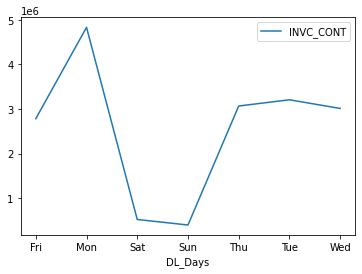

In [14]:
dt01.plot()

In [15]:
cjdt.groupby(['DL_Y','DL_Days'])[['INVC_CONT']].sum()

INVC_CONT
DL_Y DL_Days           
2019 Fri        1190382
     Mon        1967281
     Sat         220801
     Sun         143283
     Thu        1394994
     Tue        1457047
     Wed        1289863
2020 Fri        1592849
     Mon        2863312
     Sat         303435
     Sun         256904
     Thu        1672486
     Tue        1749693
     Wed        1723144

In [16]:
cjdt.groupby(['DL_Y','DL_Days'])[['INVC_CONT']].sum()

INVC_CONT
DL_Y DL_Days           
2019 Fri        1190382
     Mon        1967281
     Sat         220801
     Sun         143283
     Thu        1394994
     Tue        1457047
     Wed        1289863
2020 Fri        1592849
     Mon        2863312
     Sat         303435
     Sun         256904
     Thu        1672486
     Tue        1749693
     Wed        1723144

In [17]:
#요일 순서별 정렬, 0월 1화 2수 3목 4금 5토 6일
cjdt['DL_Dnum'] = cjdt['DL_YMD'].dt.weekday
cjdt.groupby('DL_Dnum')[['INVC_CONT']].sum()

,INVC_CONT
DL_Dnum,
0,4830593
1,3206740
2,3013007
3,3067480
4,2783231
5,524236
6,400187


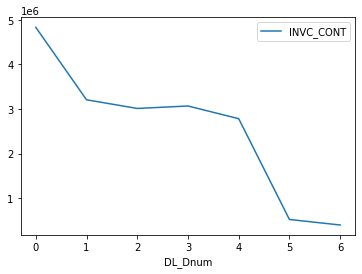

In [18]:
cjdt.groupby('DL_Dnum')[['INVC_CONT']].sum().plot()

In [19]:
dt01=cjdt.groupby(['DL_Y','DL_Dnum'])[['INVC_CONT']].sum()
dt01

INVC_CONT
DL_Y DL_Dnum           
2019 0          1967281
     1          1457047
     2          1289863
     3          1394994
     4          1190382
     5           220801
     6           143283
2020 0          2863312
     1          1749693
     2          1723144
     3          1672486
     4          1592849
     5           303435
     6           256904

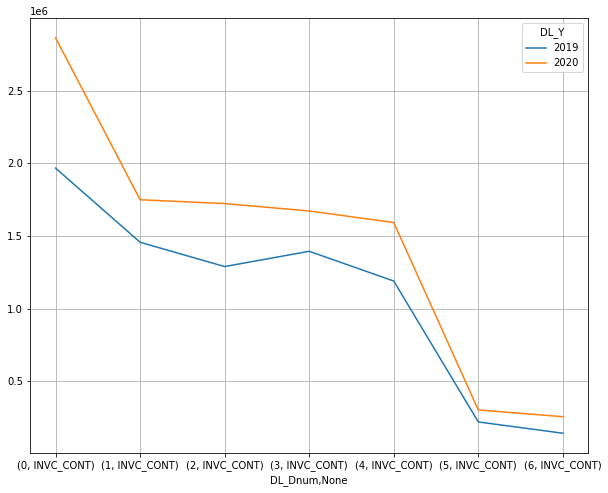

In [20]:
#fig, ax = plt.subplots()
dt01.stack().unstack(0).plot(figsize=(10,8), grid=True)

In [21]:
#단일변수
#카테고리별 총 물류량

In [22]:
cjdt.groupby('DL_GD_LCLS_NM')[['INVC_CONT']].sum()

,INVC_CONT
DL_GD_LCLS_NM,
가구/인테리어,620358
도서/음반,1202279
디지털/가전,1335898
생활건강,3370532
스포츠/레저,193375
식품,4210021
출산/육아,88766
패션의류,3492144
패션잡화,1254317


In [23]:
cjdt.groupby('DL_GD_LCLS_NM')[['INVC_CONT']].sum(). \
sort_values(by='INVC_CONT', ascending=False)

,INVC_CONT
DL_GD_LCLS_NM,
식품,4210021
패션의류,3492144
생활건강,3370532
화장품/미용,2057784
디지털/가전,1335898
패션잡화,1254317
도서/음반,1202279
가구/인테리어,620358
스포츠/레저,193375


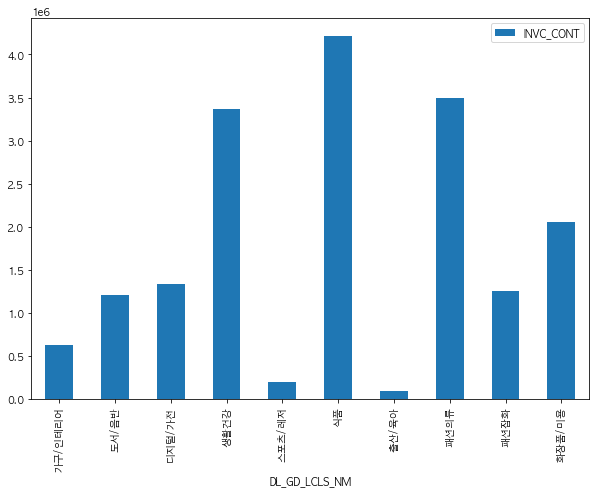

In [24]:
plt.rcParams['font.family'] = 'AppleGothic'

cjdt.groupby('DL_GD_LCLS_NM')[['INVC_CONT']].sum().plot(kind='bar', figsize=(10,7))

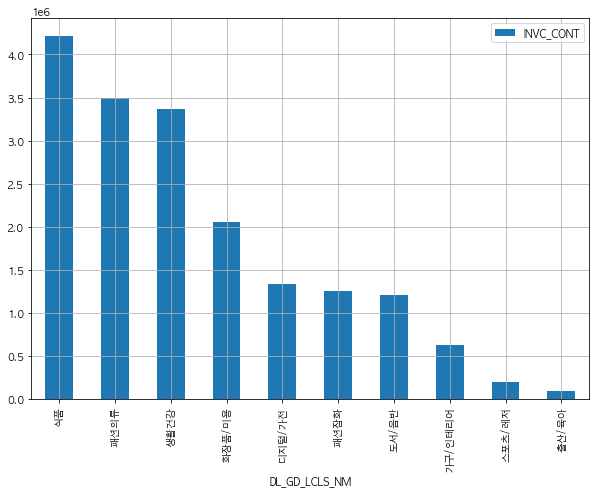

In [25]:
cjdt.groupby('DL_GD_LCLS_NM')[['INVC_CONT']].sum(). \
sort_values(by='INVC_CONT', ascending=False). \
plot(kind='bar', figsize=(10,7), grid=True)

In [26]:
cjdt.groupby(['DL_Y','DL_GD_LCLS_NM'])[['INVC_CONT']].sum()

INVC_CONT
DL_Y DL_GD_LCLS_NM           
2019 가구/인테리어           269331
     도서/음반             503722
     디지털/가전            585713
     생활건강             1334370
     스포츠/레저             87139
     식품               1625712
     출산/육아              42261
     패션의류             1651184
     패션잡화              602935
     화장품/미용            961284
2020 가구/인테리어           351027
     도서/음반             698557
     디지털/가전            750185
     생활건강             2036162
     스포츠/레저            106236
     식품               2584309
     출산/육아              46505
     패션의류             1840960
     패션잡화              651382
     화장품/미용           1096500

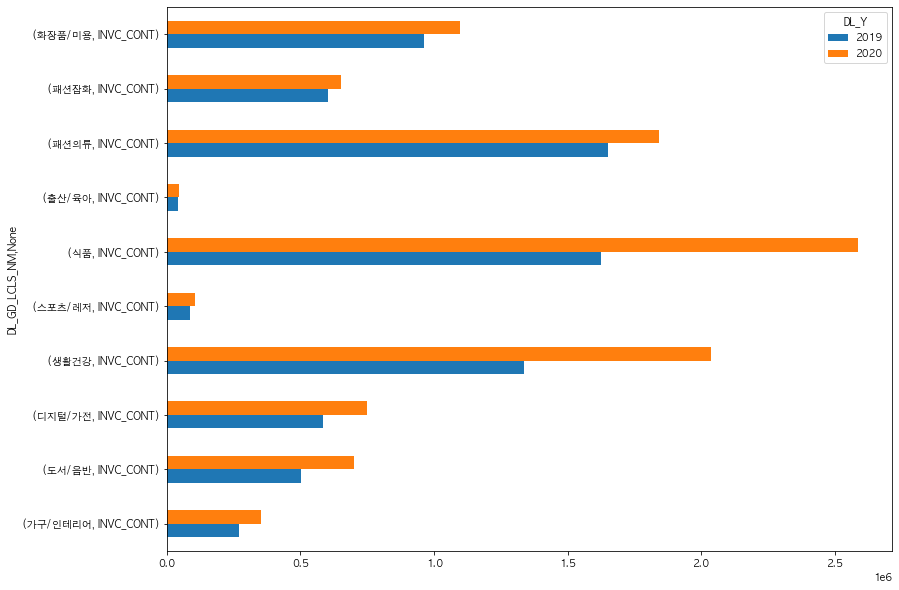

In [27]:
cjdt.groupby(['DL_Y','DL_GD_LCLS_NM'])[['INVC_CONT']].sum(). \
stack().unstack(0).plot(figsize=(13,10), kind='barh')

#특이점
#2019년엔 카테고리별 물류량이 패션의류, 식품, 생활건강, 화장품/미용 순으로 높았는데
#2020년엔 식품, 생활건강, 패션의류, 화장품/미용 으로 순위가 바뀜. 특히 식품, 생활건강, 패션의류에서 변화

In [28]:
cjdt.info()
cjdt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DL_YMD         156571 non-null  datetime64[ns]
 1   DL_GD_LCLS_NM  156571 non-null  object        
 2   DL_GD_LCLS_CD  156571 non-null  int64         
 3   CTPV_NM        156571 non-null  object        
 4   CTPV_CD        156571 non-null  int64         
 5   CTGG_NM        156571 non-null  object        
 6   CTGG_CD        156571 non-null  int64         
 7   HDNG_NM        156571 non-null  object        
 8   HDNG_CD        156571 non-null  int64         
 9   INVC_CONT      156571 non-null  int64         
 10  DL_YM          156571 non-null  object        
 11  DL_Y           156571 non-null  object        
 12  DL_Days        156571 non-null  object        
 13  DL_Dnum        156571 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(7)
memory usa

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT,DL_YM,DL_Y,DL_Days,DL_Dnum
0,2019-02-01,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,1902,2019,Fri,4
1,2019-02-01,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,1902,2019,Fri,4
2,2019-02-01,가구/인테리어,10,대구광역시,27,중구,11,성내1동,565,1,1902,2019,Fri,4
3,2019-02-01,도서/음반,12,대구광역시,27,중구,11,남산2동,650,6,1902,2019,Fri,4
4,2019-02-01,디지털/가전,13,대구광역시,27,수성구,26,고산3동,690,21,1902,2019,Fri,4


In [29]:
#지역별
cjdt.groupby('CTPV_NM')[['INVC_CONT']].sum()
#'약 1.41배 차이'

,INVC_CONT
CTPV_NM,
대구광역시,7393506
서울특별시,10431968


In [30]:
cjdt.groupby(['DL_Y','CTPV_NM'])[['INVC_CONT']].sum()

INVC_CONT
DL_Y CTPV_NM           
2019 대구광역시      3074940
     서울특별시      4588711
2020 대구광역시      4318566
     서울특별시      5843257

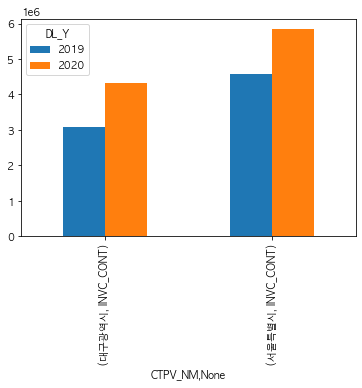

In [31]:
cjdt.groupby(['DL_Y','CTPV_NM'])[['INVC_CONT']].sum().stack().unstack(0).plot(kind='bar')

In [32]:
#지역별 구별
cjdt.groupby(['DL_Y','CTPV_NM','CTGG_NM'])[['INVC_CONT']].sum()

INVC_CONT
DL_Y CTPV_NM CTGG_NM           
2019 대구광역시   수성구        2358030
             중구          716910
     서울특별시   노원구        2942510
             중구         1646201
2020 대구광역시   수성구        3442783
             중구          875783
     서울특별시   노원구        3869442
             중구         1973815

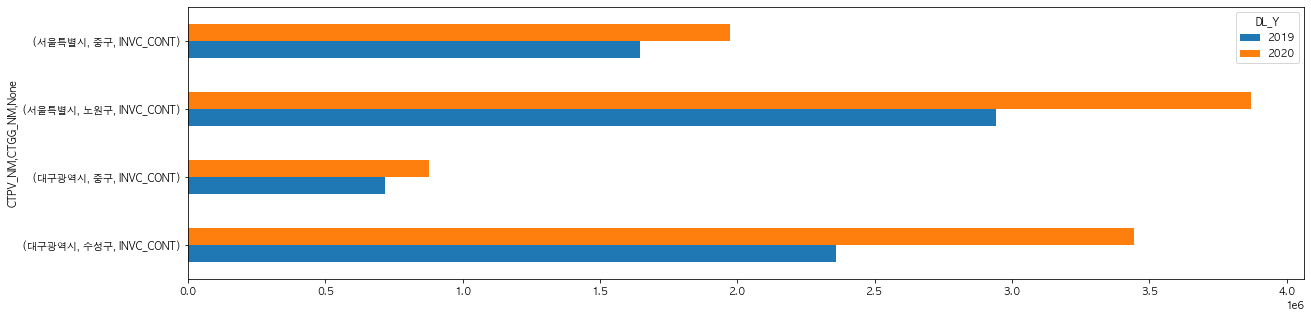

In [33]:
cjdt.groupby(['DL_Y','CTPV_NM','CTGG_NM'])[['INVC_CONT']].sum().stack().unstack(0). \
plot(kind='barh', figsize=(20,5))

In [34]:
#지역별 동별
#데이터 분리

cjdt_seoul = cjdt[cjdt['CTPV_NM']=='서울특별시']
cjdt_daegu = cjdt[cjdt['CTPV_NM']=='대구광역시']

In [35]:
cjdt_seoul.head()
#cjdt_daegu.head()

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT,DL_YM,DL_Y,DL_Days,DL_Dnum
0,2019-02-01,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,1902,2019,Fri,4
1,2019-02-01,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,1902,2019,Fri,4
5,2019-02-01,도서/음반,12,서울특별시,11,중구,14,회현동,540,25,1902,2019,Fri,4
7,2019-02-01,디지털/가전,13,서울특별시,11,중구,14,황학동,670,14,1902,2019,Fri,4
13,2019-02-01,가구/인테리어,10,서울특별시,11,중구,14,약수동,635,4,1902,2019,Fri,4


In [36]:
#서울 동별
cjdt_seoul.groupby(['CTGG_NM','HDNG_NM'])[['INVC_CONT']].sum()

INVC_CONT
CTGG_NM HDNG_NM           
노원구     공릉1동        537326
        공릉2동        604646
        상계10동       194331
        상계1동        496414
        상계2동        314446
        상계3.4동      261917
        상계5동        276532
        상계6.7동      501482
        상계8동        325924
        상계9동        355366
        월계1동        306332
        월계2동        286650
        월계3동        378107
        중계1동        353859
        중계2.3동      423227
        중계4동        244200
        중계본동        318002
        하계1동        352289
        하계2동        280902
중구      광희동         347586
        다산동         234130
        동화동         162661
        명동          357190
        소공동         292707
        신당동         387979
        신당제5동       183300
        약수동         246242
        을지로동        152596
        장충동         119612
        중림동         216986
        청구동         200351
        필동          153858
        황학동         271864
        회현동         292954

In [37]:
cjdt_seoul.groupby(['CTGG_NM','HDNG_NM'])[['INVC_CONT']].sum().sort_values(by='INVC_CONT',ascending=False)

INVC_CONT
CTGG_NM HDNG_NM           
노원구     공릉2동        604646
        공릉1동        537326
        상계6.7동      501482
        상계1동        496414
        중계2.3동      423227
중구      신당동         387979
노원구     월계3동        378107
중구      명동          357190
노원구     상계9동        355366
        중계1동        353859
        하계1동        352289
중구      광희동         347586
노원구     상계8동        325924
        중계본동        318002
        상계2동        314446
        월계1동        306332
중구      회현동         292954
        소공동         292707
노원구     월계2동        286650
        하계2동        280902
        상계5동        276532
중구      황학동         271864
노원구     상계3.4동      261917
중구      약수동         246242
노원구     중계4동        244200
중구      다산동         234130
        중림동         216986
        청구동         200351
노원구     상계10동       194331
중구      신당제5동       183300
        동화동         162661
        필동          153858
        을지로동        152596
        장충동         119612

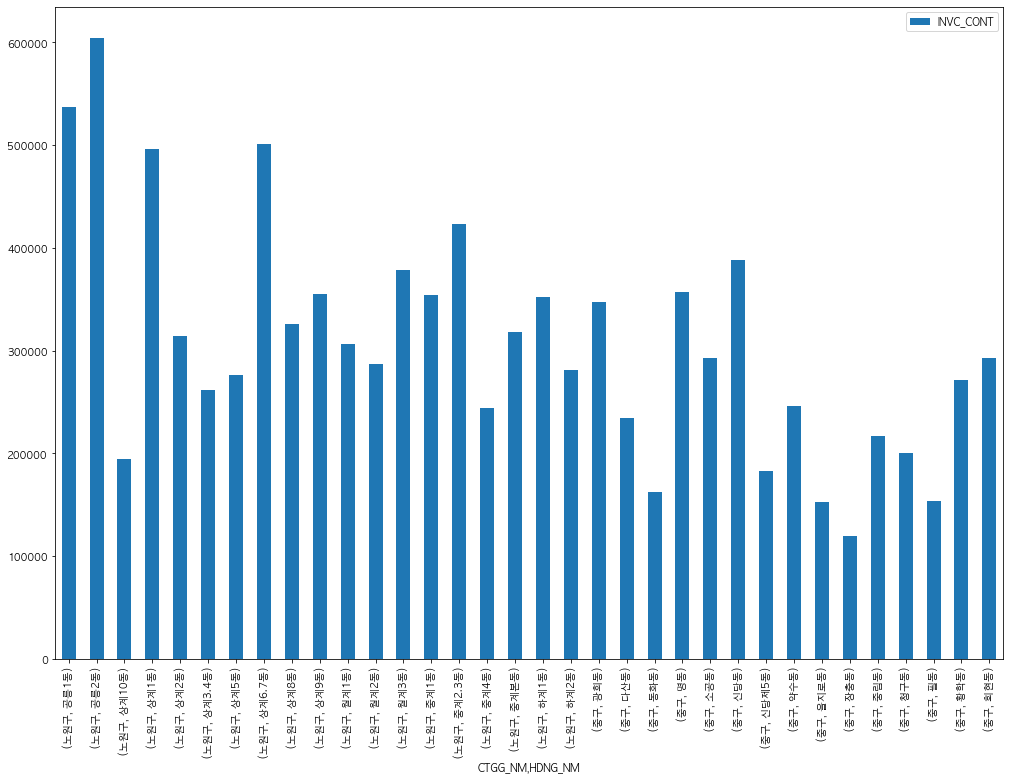

In [38]:
cjdt_seoul.groupby(['CTGG_NM','HDNG_NM'])[['INVC_CONT']].sum().plot(figsize=(17,12), kind='bar')

In [39]:
cjdt_seoul['CTDNG']=cjdt_seoul['CTGG_NM'].map(str)+cjdt_seoul['HDNG_NM']
cjdt_seoul.head()

<ipython-input-39-b1de7b59c121>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cjdt_seoul['CTDNG']=cjdt_seoul['CTGG_NM'].map(str)+cjdt_seoul['HDNG_NM']


,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT,DL_YM,DL_Y,DL_Days,DL_Dnum,CTDNG
0,2019-02-01,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,1902,2019,Fri,4,중구동화동
1,2019-02-01,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,1902,2019,Fri,4,중구신당동
5,2019-02-01,도서/음반,12,서울특별시,11,중구,14,회현동,540,25,1902,2019,Fri,4,중구회현동
7,2019-02-01,디지털/가전,13,서울특별시,11,중구,14,황학동,670,14,1902,2019,Fri,4,중구황학동
13,2019-02-01,가구/인테리어,10,서울특별시,11,중구,14,약수동,635,4,1902,2019,Fri,4,중구약수동


In [40]:
cjdt_daegu['CTDNG']=cjdt_daegu['CTGG_NM'].map(str)+cjdt_daegu['HDNG_NM']

<ipython-input-40-fc89e67393ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cjdt_daegu['CTDNG']=cjdt_daegu['CTGG_NM'].map(str)+cjdt_daegu['HDNG_NM']


In [41]:
cjdt_seoul.groupby(['DL_Y','CTDNG'])[['INVC_CONT']].sum(). \
sort_values(by=['DL_Y','INVC_CONT'], ascending=False)

INVC_CONT
DL_Y CTDNG               
2020 노원구공릉2동       333458
     노원구공릉1동       301220
     노원구상계1동       281177
     노원구상계6.7동     280938
     노원구중계2.3동     238215
...                   ...
2019 중구동화동          77792
     중구신당제5동        74229
     중구을지로동         73123
     중구필동           72576
     중구장충동          54348

[68 rows x 1 columns]

In [42]:
dt04=cjdt_seoul.groupby(['DL_Y','CTDNG'],as_index=False)[['INVC_CONT']].sum()
dt04[dt04['DL_Y']=='2019'].sort_values(by='INVC_CONT', ascending=False)

,DL_Y,CTDNG,INVC_CONT
1,2019,노원구공릉2동,271188
0,2019,노원구공릉1동,236106
7,2019,노원구상계6.7동,220544
3,2019,노원구상계1동,215237
14,2019,노원구중계2.3동,185012
22,2019,중구명동,183447
19,2019,중구광희동,163121
12,2019,노원구월계3동,162785
24,2019,중구신당동,162771
17,2019,노원구하계1동,152305


In [43]:
dt04[dt04['DL_Y']=='2020'].sort_values(by='INVC_CONT', ascending=False)

,DL_Y,CTDNG,INVC_CONT
35,2020,노원구공릉2동,333458
34,2020,노원구공릉1동,301220
37,2020,노원구상계1동,281177
41,2020,노원구상계6.7동,280938
48,2020,노원구중계2.3동,238215
58,2020,중구신당동,225208
46,2020,노원구월계3동,215322
43,2020,노원구상계9동,212098
47,2020,노원구중계1동,209507
51,2020,노원구하계1동,199984


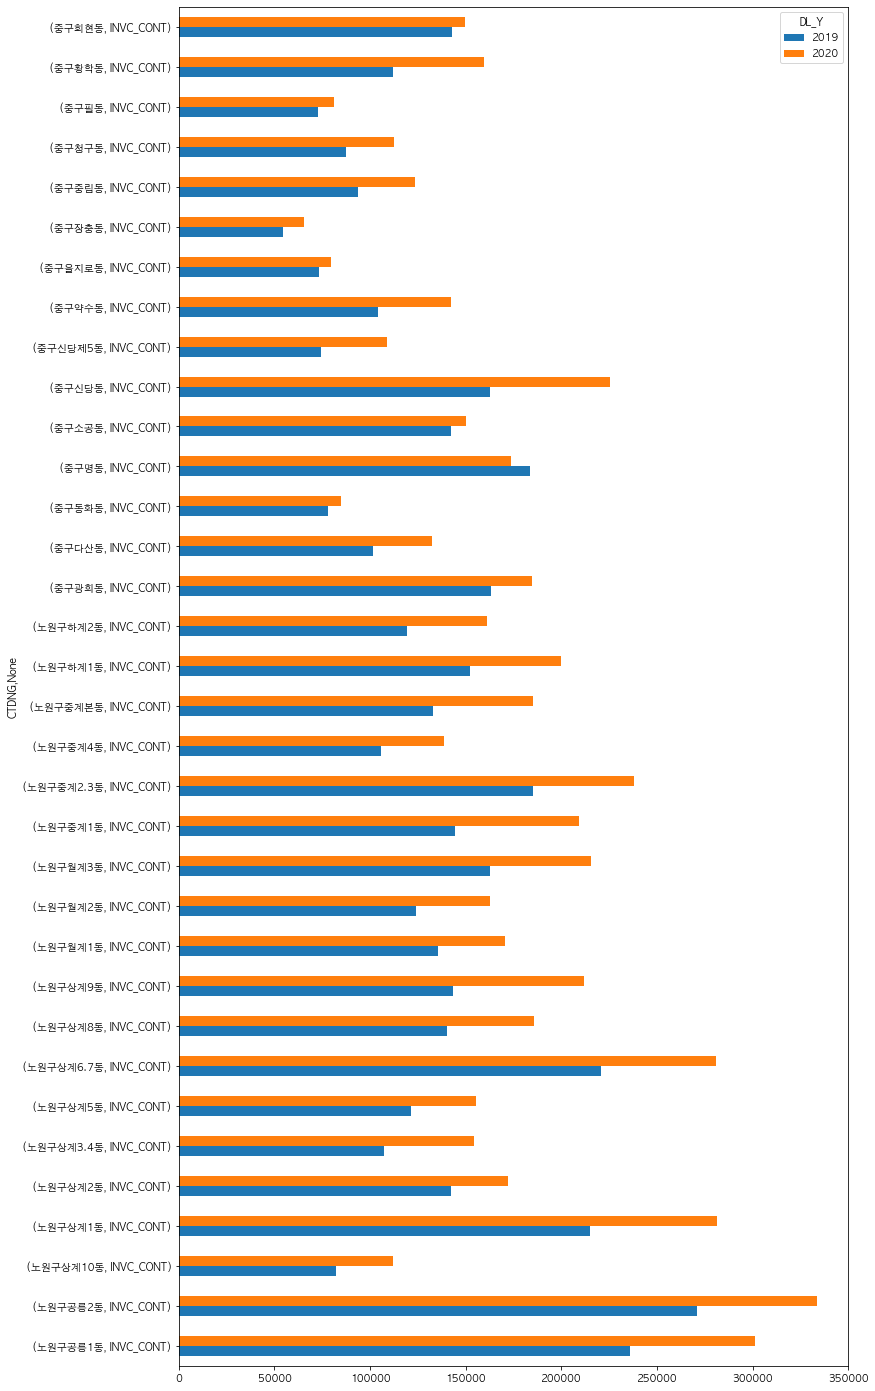

In [44]:
cjdt_seoul.groupby(['DL_Y','CTDNG'])[['INVC_CONT']].sum().stack().unstack(0). \
plot(figsize=(12,25),kind='barh')

In [45]:
dt03=cjdt_seoul.groupby(['DL_Y','CTDNG', 'DL_GD_LCLS_NM'],as_index=False)[['INVC_CONT']].sum()
dt03

,DL_Y,CTDNG,DL_GD_LCLS_NM,INVC_CONT
0,2019,노원구공릉1동,가구/인테리어,9181
1,2019,노원구공릉1동,도서/음반,11848
2,2019,노원구공릉1동,디지털/가전,18630
3,2019,노원구공릉1동,생활건강,41130
4,2019,노원구공릉1동,스포츠/레저,2786
...,...,...,...,...
675,2020,중구회현동,식품,37000
676,2020,중구회현동,출산/육아,331
677,2020,중구회현동,패션의류,17716
678,2020,중구회현동,패션잡화,11784


In [46]:
dt03[dt03['DL_Y']=='2019'].sort_values(by='INVC_CONT', ascending=False)

,DL_Y,CTDNG,DL_GD_LCLS_NM,INVC_CONT
17,2019,노원구공릉2동,패션의류,58251
15,2019,노원구공릉2동,식품,56471
97,2019,노원구상계9동,패션의류,53520
5,2019,노원구공릉1동,식품,51947
7,2019,노원구공릉1동,패션의류,51158
...,...,...,...,...
216,2019,중구동화동,출산/육아,334
206,2019,중구다산동,출산/육아,325
316,2019,중구필동,출산/육아,232
286,2019,중구장충동,출산/육아,169


In [47]:
dt03[dt03['DL_Y']=='2020'].sort_values(by='INVC_CONT', ascending=False)

,DL_Y,CTDNG,DL_GD_LCLS_NM,INVC_CONT
437,2020,노원구상계9동,패션의류,87167
355,2020,노원구공릉2동,식품,82645
415,2020,노원구상계6.7동,식품,75889
345,2020,노원구공릉1동,식품,74838
375,2020,노원구상계1동,식품,72307
...,...,...,...,...
576,2020,중구소공동,출산/육아,255
626,2020,중구장충동,출산/육아,175
566,2020,중구명동,출산/육아,172
656,2020,중구필동,출산/육아,141


In [48]:
#편의상 안고친것

#x축 y축 이름 못생긴거